# Analyse some metagenomics data to identify corelated contigs

You can copy and paste these commands into Google Colab, and run this notebook to identify which contigs might belong together, eg. come from the same genomes


## Step 1. Import some libaries

In [3]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


If you have the data file locally, you can upload it to colab. Otherwise, you can connect Google drive and read the file from there!

In [4]:
# df = pd.read_csv('788707_20180129_S_coverage.tsv', sep="\t", index_col=0)

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/Workshops/788707_20180129_S_coverage.tsv', sep="\t", index_col=0)
df

Mounted at /content/drive


,788707_20171213_S,788707_20180129_S,788707_20180313_S,788707_20181126_S
contig,,,,
k141_0,0.000000,4.20440,0.00000,0.00000
k141_1,0.000000,3.85587,9.21708,1.77046
k141_10,0.000000,2.14286,0.00000,0.00000
k141_100,0.000000,2.86104,0.00000,0.00000
k141_1000,0.000000,2.42775,0.00000,0.00000
...,...,...,...,...
k141_9995,0.000000,5.15532,3.16151,0.00000
k141_9996,0.000000,3.68349,0.00000,0.00000
k141_9997,0.170054,6.28332,11.11980,0.13688


In [20]:
# read the lengths of the sequences

seqlengths = pd.read_csv('drive/MyDrive/Workshops/final.contigs.lengths.tsv', sep="\t", index_col=0, header=None, names=['contig', 'length'])
seqlengths

,length
contig,
k141_1800,347
k141_12597,379
k141_8999,397
k141_0,455
k141_10798,565
...,...
k141_3595,2053
k141_3596,3022
k141_3597,471


### Filter the reads

In this example, we filter this data set to ensure that the sample `788707_20171213_S` has at least one hit.

In [5]:
dfs = df[df['788707_20171213_S'] > 0]
dfs

,788707_20171213_S,788707_20180129_S,788707_20180313_S,788707_20181126_S
contig,,,,
k141_10016,0.349473,8.00344,8.01700,0.482462
k141_10116,0.104002,5.24973,5.87481,0.155361
k141_10189,0.317612,5.15224,5.75403,0.226567
k141_10215,0.281800,1.88650,0.00000,0.000000
k141_10223,0.314713,6.19827,8.20220,0.141096
...,...,...,...,...
k141_9786,0.216080,4.71022,6.42379,0.000000
k141_9827,0.051166,5.59172,8.86182,0.327532
k141_9878,0.723157,5.43338,6.00259,0.675291


We are going to reshape this data frame so we can plot the samples on the x-axis and the depth on the y-axis.

In [6]:
melted_df = dfs.reset_index().melt(id_vars='contig', var_name='Sample', value_name='Depth')
melted_df

,contig,Sample,Depth
0,k141_10016,788707_20171213_S,0.349473
1,k141_10116,788707_20171213_S,0.104002
2,k141_10189,788707_20171213_S,0.317612
3,k141_10215,788707_20171213_S,0.281800
4,k141_10223,788707_20171213_S,0.314713
...,...,...,...
1067,k141_9786,788707_20181126_S,0.000000
1068,k141_9827,788707_20181126_S,0.327532
1069,k141_9878,788707_20181126_S,0.675291
1070,k141_993,788707_20181126_S,0.000000


And now we plot _all_ the raw data.

<Axes: xlabel='Sample', ylabel='Depth'>

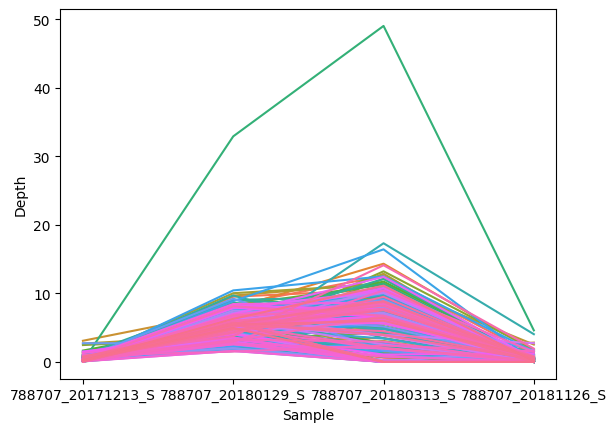

In [ ]:
sns.lineplot(data=melted_df, x='Sample', y='Depth', hue='contig', legend=False)


## Calculate the corrrelations

Now that we have the contigs and their average depth across the samples, we calculate a pairwise correlation between all contigs and all other contigs.

We create a matrix of the data

In [8]:
correlation_matrix = dfs.T.corr()
correlation_matrix

contig,k141_10016,k141_10116,k141_10189,k141_10215,k141_10223,k141_10246,k141_1032,k141_10423,k141_10428,k141_10650,...,k141_954,k141_9546,k141_9580,k141_9607,k141_9757,k141_9786,k141_9827,k141_9878,k141_993,k141_9997
contig,,,,,,,,,,,,,,,,,,,,,
k141_10016,1.000000,0.996792,0.996441,0.508572,0.979783,0.658830,0.986242,0.809457,0.965302,0.979254,...,0.989863,0.871763,0.960788,0.964751,0.552240,0.975736,0.950348,0.996718,0.551643,0.928814
k141_10116,0.996792,1.000000,0.999818,0.439789,0.992605,0.598469,0.996125,0.760683,0.982974,0.992184,...,0.975326,0.908177,0.978922,0.940594,0.484368,0.990024,0.972032,0.999910,0.483753,0.955475
k141_10189,0.996441,0.999818,1.000000,0.441502,0.992971,0.600309,0.995603,0.761247,0.982628,0.992777,...,0.974600,0.908885,0.977602,0.939722,0.484583,0.990595,0.971656,0.999982,0.483989,0.955697
k141_10215,0.508572,0.439789,0.441502,1.000000,0.333871,0.982519,0.359496,0.916842,0.267551,0.334774,...,0.621728,0.032094,0.250488,0.711676,0.995781,0.318277,0.216954,0.442515,0.995902,0.159266
k141_10223,0.979783,0.992605,0.992971,0.333871,1.000000,0.503240,0.998403,0.679663,0.997104,0.999929,...,0.941469,0.951854,0.993001,0.892769,0.378057,0.999789,0.992220,0.992698,0.377442,0.983725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
k141_9786,0.975736,0.990024,0.990595,0.318277,0.999789,0.489031,0.997131,0.666870,0.997652,0.999848,...,0.934851,0.957208,0.993212,0.884099,0.361827,1.000000,0.993662,0.990231,0.361220,0.986580
k141_9827,0.950348,0.972032,0.971656,0.216954,0.992220,0.394236,0.988654,0.586973,0.998634,0.991695,...,0.896996,0.979915,0.997981,0.835481,0.265431,0.993662,1.000000,0.971407,0.264747,0.997591
k141_9878,0.996718,0.999910,0.999982,0.442515,0.992698,0.601123,0.995651,0.762202,0.982458,0.992436,...,0.975225,0.908001,0.977704,0.940590,0.486016,0.990231,0.971407,1.000000,0.485417,0.955167


## Find the highest correlations

We filter _all_ the correlations to find the highest correlations. I chose the 0.99 cutoff somewhat at random, and adjusting the cutoff may adjust the number of contigs in each correlation.

We just print the first ten correlations so we can see what we have!

In [9]:
threshold = 0.99
high_corr = []
for i in range(len(correlation_matrix)):
    for j in range(i + 1, len(correlation_matrix)):  # Avoid duplicate pairs
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr.append((correlation_matrix.index[i], correlation_matrix.index[j], correlation_matrix.iloc[i, j]))
high_corr[0:10]

[('k141_10016', 'k141_10116', 0.996792125391458),
 ('k141_10016', 'k141_10189', 0.9964405384854441),
 ('k141_10016', 'k141_10800', 0.9972954723833105),
 ('k141_10016', 'k141_10972', 0.9944781039111493),
 ('k141_10016', 'k141_1109', 0.9913296965337903),
 ('k141_10016', 'k141_11159', 0.9924435053352318),
 ('k141_10016', 'k141_11254', 0.9902469276432863),
 ('k141_10016', 'k141_11790', 0.9926073160612265),
 ('k141_10016', 'k141_12363', 0.9912386345429348),
 ('k141_10016', 'k141_13277', 0.9959828223878939)]

### Find the longest contigs

We find the two longest contigs that are in our correlation matrix so we can plot their data

In [25]:
hc = set()
for i in high_corr:
  hc.add(i[0])

seqlengths[seqlengths.index.isin(hc)].sort_values(by='length')

,length
contig,
k141_9055,305
k141_3728,307
k141_3084,310
k141_1386,324
k141_8665,325
...,...
k141_7934,7537
k141_6589,8079
k141_7068,8304


Here, we are going to find the two contigs in hc that have the lowest correlations between them - these should be diverse genomes!

In [50]:
subset_corr = correlation_matrix.loc['k141_12474', list(hc)]
subset_corr.sort_values(ascending=True)

,k141_12474
contig,
k141_13159,0.055370
k141_13759,0.093904
k141_3084,0.103676
k141_380,0.131021
k141_198,0.131109
...,...
k141_10999,0.999828
k141_7934,0.999917
k141_10428,0.999921


Now that we have two long contigs, lets get lists of all the things they are correlated

In [51]:
related_contigs = ['k141_12474']
for i in high_corr:
  if i[0] == related_contigs[0]:
    related_contigs.append(i[1])

related_contigs2 = ['k141_13159']
for i in high_corr:
  if i[0] == related_contigs2[0]:
    related_contigs2.append(i[1])


Now, we plot the data just like we did before. Here, I have only ploted the lines, but you can use `hue` to plot the individual lines in the data

In [52]:
dfsubset1 = df[df.index.isin(related_contigs)]
dfsubset2 = df[df.index.isin(related_contigs2)]
melted_df1 = dfsubset1.reset_index().melt(id_vars='contig', var_name='Sample', value_name='Depth')
melted_df2 = dfsubset2.reset_index().melt(id_vars='contig', var_name='Sample', value_name='Depth')

<Axes: xlabel='Sample', ylabel='Depth'>

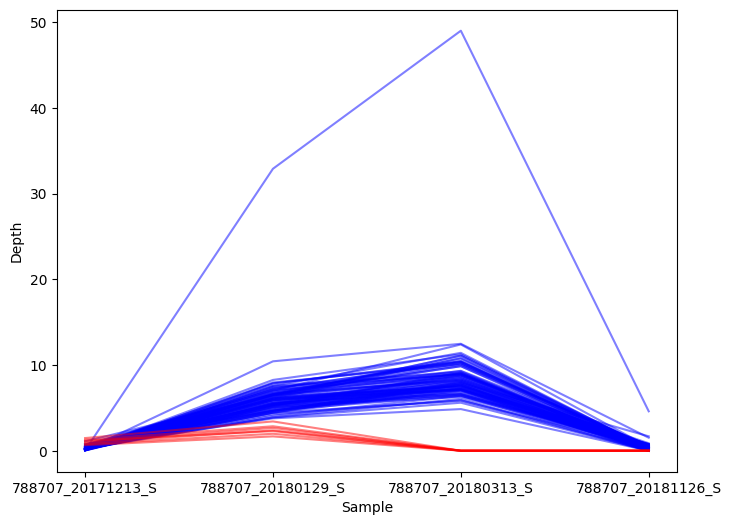

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=melted_df1, x='Sample', y='Depth', c='b', estimator=None, units='contig', alpha=0.5, legend=False, ax=ax)
sns.lineplot(data=melted_df2, x='Sample', y='Depth', c='r', estimator=None, units='contig', alpha=0.5, legend=False, ax=ax)
